In [6]:
import requests
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from Scott_keys import gkey

In [7]:
# import delivery csv
delivery_data = pd.read_csv("delivery_dataframe_run.csv")
delivery_df = pd.DataFrame(delivery_data)
delivery_df.head()

,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars
0,10001,50,35.0,0.700000,82.6
1,10002,160,54.0,0.337500,81.6
2,10003,89,62.0,0.696629,78.3
3,10004,20,12.0,0.600000,81.1
4,10005,6,4.0,0.666667,83.5


In [8]:
# add column to hold # HH No Cars 
delivery_df["# No Cars"] = ""
delivery_df.head()


,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars,# No Cars
0,10001,50,35.0,0.700000,82.6,
1,10002,160,54.0,0.337500,81.6,
2,10003,89,62.0,0.696629,78.3,
3,10004,20,12.0,0.600000,81.1,
4,10005,6,4.0,0.666667,83.5,


In [10]:
# call to the census api and get info about # without cars
base_url = "https://api.census.gov/data/2017/acs/acs5/profile"
hh_num_no_vehicles = "DP04_0058E"
for index, row in delivery_df.iterrows():    
    zip = str(row['Zip Code']).replace('.0','')
    query_url = f"{base_url}?get={hh_num_no_vehicles},NAME&for=zip%20code%20tabulation%20area:{zip}&key={gkey}"
    try:
        print(f"Finding demo data for zip code: {zip}")
        response = requests.get(query_url).json()
        delivery_df.loc[index, "# No Cars"] = response[1][0]
    except json.decoder.JSONDecodeError:
        print("Missing field/result... skipping.") 
    print("-------------------------------------------")

Finding demo data for zip code: 10001
-------------------------------------------
Finding demo data for zip code: 10002
-------------------------------------------
Finding demo data for zip code: 10003
-------------------------------------------
Finding demo data for zip code: 10004
-------------------------------------------
Finding demo data for zip code: 10005
-------------------------------------------
Finding demo data for zip code: 10006
-------------------------------------------
Finding demo data for zip code: 10007
-------------------------------------------
Finding demo data for zip code: 10009
-------------------------------------------
Finding demo data for zip code: 10010
-------------------------------------------
Finding demo data for zip code: 10011
-------------------------------------------
Finding demo data for zip code: 10012
-------------------------------------------
Finding demo data for zip code: 10013
-------------------------------------------
Finding demo dat

-------------------------------------------
Finding demo data for zip code: 11215
-------------------------------------------
Finding demo data for zip code: 11216
-------------------------------------------
Finding demo data for zip code: 11217
-------------------------------------------
Finding demo data for zip code: 11218
-------------------------------------------
Finding demo data for zip code: 11219
-------------------------------------------
Finding demo data for zip code: 11220
-------------------------------------------
Finding demo data for zip code: 11221
-------------------------------------------
Finding demo data for zip code: 11222
-------------------------------------------
Finding demo data for zip code: 11223
-------------------------------------------
Finding demo data for zip code: 11224
-------------------------------------------
Finding demo data for zip code: 11225
-------------------------------------------
Finding demo data for zip code: 11226
----------------

In [11]:
delivery_df.head()


,Zip Code,# Pizza/Chinese Restaurants,# That Deliver,% That Deliver,% No Cars,# No Cars
0,10001,50,35.0,0.700000,82.6,10193
1,10002,160,54.0,0.337500,81.6,27306
2,10003,89,62.0,0.696629,78.3,20895
3,10004,20,12.0,0.600000,81.1,1287
4,10005,6,4.0,0.666667,83.5,3538


In [13]:
# find the avg % delivery and avg % no cars
delivery_df.mean()


Zip Code                       1.081511e+04
# Pizza/Chinese Restaurants    2.755114e+01
# That Deliver                 1.498864e+01
% That Deliver                 5.400624e-01
% No Cars                      5.031193e+01
# No Cars                               inf
dtype: float64

Text(0.5, 1.0, 'NYC Restaurant Delivery')

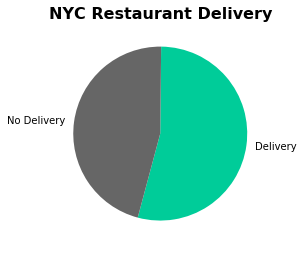

In [65]:
# make a pie chart of the overall % of delivery restaurants in NYC

labels= ['Delivery', 'No Delivery']
x= [54,46]
colors= ['#00CC99','#666666']

plt.pie(x, labels=labels, colors=colors, startangle=255)
plt.title("NYC Restaurant Delivery",fontsize=16, fontweight="bold")


In [70]:
plt.savefig("Delivery_Pie.png")

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'NYC HH Vehicle Ownership')

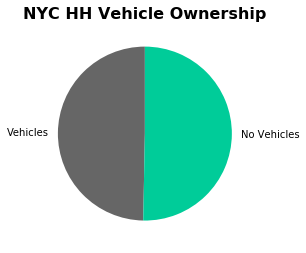

In [74]:
# make a pie chart of the overall % of NYC HH with no vehicles

labels= ['Vehicles', 'No Vehicles']
x= [49.7,50.3]
colors= ['#666666','#00CC99']

plt.pie(x, labels=labels, colors=colors, startangle=90)
plt.title("NYC HH Vehicle Ownership",fontsize=16, fontweight="bold")


In [72]:
plt.savefig("Vehicle_Pie.png")

<Figure size 432x288 with 0 Axes>